In [2]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 28.1 MB/s eta 0:00:00


In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [4]:
from PIL import Image
from IPython.display import display

In [5]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [6]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
def show_image(path_str):
  img = Image.open(path_str).convert("RGB")
  display(img)
  return img

In [9]:
def ocr_image(src_img):
  p_v = processor(images= src_img, return_tensors= "pt").pixel_values
  g_ids = model.generate(p_v)
  return processor.batch_decode(g_ids, skip_special_tokens= True)[0]

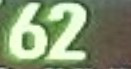

In [14]:
img = show_image("/content/m_2_2_hr.jpeg")

In [15]:
ocr_image(img)

'62'